# 🚢TITANIC SURVIVAL PREDICTION #

| Symbol | Step                            | Description                                                 |
| ------ | ------------------------------- | ----------------------------------------------------------- |
| 🎯     | Problem Definition              | Define the goal and type of machine learning problem.       |
| 📥     | Data Collection                 | Load and access the dataset.                                |
| 🧹     | Data Preprocessing              | Clean data, handle missing values, and encode variables.    |
| 📊     | Exploratory Data Analysis (EDA) | Visualize data to uncover patterns and correlations.        |
| 🧠     | Feature Selection & Scaling     | Choose and normalize features for modeling.                 |
| 🤖     | Model Selection & Training      | Choose ML algorithm and train it on the dataset.            |
| 📏     | Assumptions Check               | Validate model assumptions (mainly for statistical models). |
| 🧪     | Model Evaluation                | Assess model performance using metrics.                     |
| 💾     | Save the Model                  | Save trained model and other components (e.g., scaler).     |
| 📤     | Submission / Prediction         | Use the model to make predictions and save results.         |

## 🎯 Problem Definition ##

**Objective:** Predict survival (0 or 1) of passengers on the Titanic.

**Type:** Binary classification

## 📦 Load the Dataset ##

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\OneDrive\NeuroNexon Innovations\Titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 🧹 Data Preprocessing ##

- Handle missing values

- Drop irrelevant columns

- Encode categorical variables

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# Fill the missing values in the Columns(Age,Fare,Cabin)
data.fillna(0, inplace=True)  # For numerical columns
# or
data.fillna('Unknown', inplace=True)  # For categorical columns

In [7]:
# Drop columns
data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

## 📊  Exploratory Data Analysis (EDA) ##

- Visualize patterns and relationships

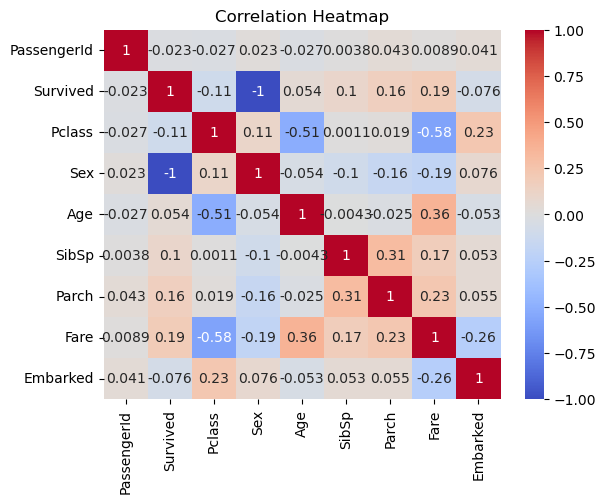

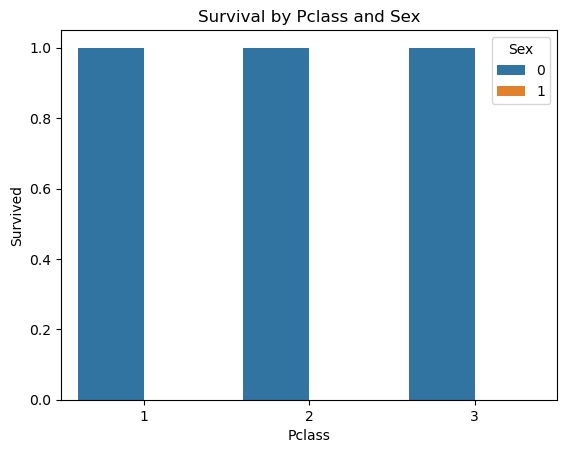

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Barplot
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival by Pclass and Sex')
plt.show()

## 🧠 Feature Selection & Scaling ##

- Select useful features and scale numerical data.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Survived', axis=1))
scaled_features

array([[-1.72791209,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.49663711, -0.47091535],
       [-1.71962474,  0.87348191, -1.32287566, ..., -0.4002477 ,
        -0.5114971 ,  0.70076689],
       [-1.71133739, -0.31581919,  0.75592895, ..., -0.4002477 ,
        -0.46333473, -0.47091535],
       ...,
       [ 1.71133739,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.50701688,  0.70076689],
       [ 1.71962474,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.49268018,  0.70076689],
       [ 1.72791209,  0.87348191,  0.75592895, ...,  0.61989583,
        -0.23626278, -1.64259759]])

## 🤖  Model Selection & Training ##

- Use RandomForestClassifier as the model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📏  Assumptions Check ##

- ✅ No assumptions required for Random Forests.

- If using models like Logistic Regression, you'd check linearity, multicollinearity, etc.

## 🧪  Model Evaluation ##

- Evaluate using Accuracy, Confusion matrix, Classification report.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[50  0]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Accuracy: 1.0


## 💾  Save the Model ##

- Save the model using joblib

In [31]:
import joblib

# Load the model from the .joblib file
joblib.dump(model, 'Titanic_Model.joblib')

saved_model = joblib.load('Titanic_Model.joblib')

# Use the loaded model for predictions
y_pred = saved_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)
# y_pred compare with y_test

Predictions: [0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]
